In [1]:
#Batch Gradient Descent

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [4]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100

In [5]:
# Create parameters that are normally distributed
# with mu = 0, variace = 1
theta = np.random.randn(2,1)
print(theta)

[[0.09427374]
 [0.82514572]]


In [6]:
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
print(theta_best)

[[4.10241112]
 [3.0539064 ]]


In [8]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [9]:
print(theta)

[[4.10241123]
 [3.05390618]]


In [10]:
#Stochastic Gradient Descent

In [11]:
n_epochs = 50
t0, t1 = 5, 50

In [12]:
def learning_schedule(t):
    return t0/ ( t + t1)

theta = np.random.rand(2, 1)

In [13]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:rand]

NameError: name 'rand' is not defined

In [16]:
import numpy as np
import matplotlib.pyplot as plt

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Error surface')

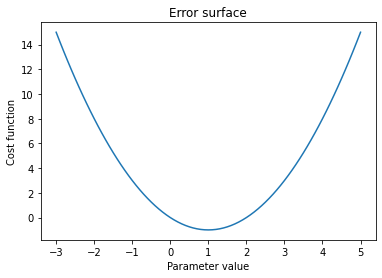

In [31]:
X_poly = np.linspace(-3, 5, 81)
print(X_poly[:5], '...', X_poly[-5:])
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')


In [17]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.90
x_next = x_start - gradient(x_start)*learning_rate
x_next

-1.7999999999999998

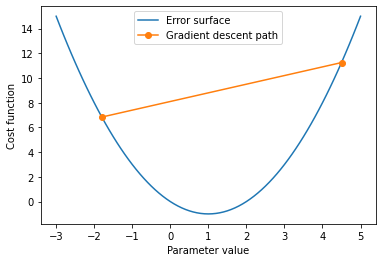

In [18]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

In [19]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1, iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1] - derivative*learning_rate
print(x_path)

[ 4.5        -1.8         3.24       -0.792       2.4336     -0.14688
  1.917504    0.2659968   1.58720256  0.53023795  1.37580964  0.69935229
  1.24051817  0.80758547  1.15393163]


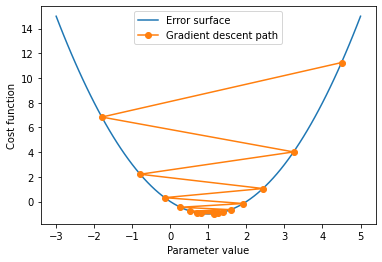

In [20]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

Text(0.5, 1.0, 'The sigmoid function')

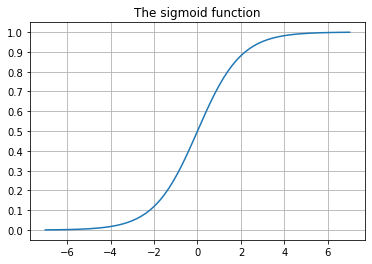

In [21]:
def sigmoid(X):
    Y = 1/ (1 + np.exp(-X))
    return Y

X_sig = np.linspace(-7, 7, 141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig, Y_sig)
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.title('The sigmoid function')

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [23]:
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=200, n_informative=3,
                                                 n_redundant=10, n_repeated=0, n_classes=2,
                                                 n_clusters_per_class=3, weights=None, flip_y=0.01,
                                                 class_sep=0.8, hypercube=True, shift=0.0, scale=1.0,
                                                 shuffle=True, random_state=24
                                                )
                                                 

In [24]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


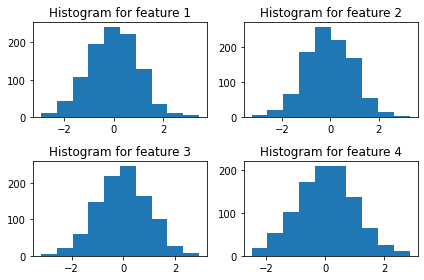

In [25]:
for plot_index in range(4):
    plt.subplot(2, 2, plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
plt.tight_layout()

In [26]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
X_synthetic, y_synthetic, test_size=0.2, random_state=24)

In [27]:
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')